
Cached Items: [40, 31, 34, 1, 15, 41, 37, 7, 26, 35]
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


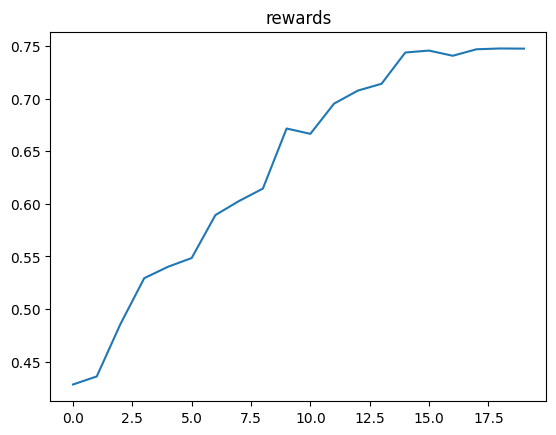

state values
[ 3.46119038  3.49376962  3.56496021  3.6632487   3.67697502  3.68378821
  3.68446329  3.71970352  3.7569292   3.76236912  3.77513069  3.79092284
  3.83322059  3.85377897  3.86166471  3.90155568  3.9159628   3.91990548
  3.94186981  3.97552431  3.98143763  3.99821049  4.02551033  4.12790538
  4.13114974  4.28520851  4.28668042  4.30350929  4.45282337  4.46260949
  4.48184525  4.63937306  4.66901063  4.80474038  4.93689879  4.94017648
  5.09760958  5.18033312  5.34877827  5.40706795  5.59418299  8.07537421
 10.65395148 11.05820694 11.55751804 11.55960992 13.31389212 13.43939522
 13.49824056 14.44093795]


In [2]:
# Part 1. Network Friendly Recommendations Project
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

#CONTENT CATALOGUE
#number of content items
K=50
#content relativity matrix
u_ij = np.random.rand(K, K)
#percentage of cached items
C=0.2*K
C=int(C)
#cache
cache=[0]*C
#content relevance threshold
u_min=0.4
#USER MODEL
#number of recomendations
N=2
#probability of ending viewing session
q=0.01
#probability of picking one item with equal prob. in case all are relevant
alpha=0.9
#probability when the user chooses from K items
p_k=1/K

# equates each action set to an integer
actions=[]

rewards=[]

def initialize_cache():
   items_in_cache = random.sample(list(range(K)), C)
   for i in range(len(items_in_cache)):
    cache[i]=items_in_cache[i]



def initialize_relativity_matrix():
  #content relativity matrix initializations
  for i in range(K):
    for j in range(0, i):
        u_ij[i][j] = u_ij[j][i]
    u_ij[i][i] = 0


def item_cost(item):
  if item in cache:
    return 1
  else:
    return 0

#check if all items are above u_min
def all_bigger_than_u_min(current_item,recommended_items):
  for i in recommended_items:
    relevance=u_ij[i,current_item]
    if(relevance<u_min):
      return False
  return True

#simulate user behaviour
def user_sim(current_state,recommended_items):
  done=False
  new_state=-1
  reward=0

  end_session=np.random.rand()
  #check if the user quits watching stupid memes and decides to do something better with their lives
  if(end_session<q):
    done=True
  else: #user continues procrastinating instead of doing RL project
    #check if all recomended items are relevant
    if all_bigger_than_u_min(current_state,recommended_items):
        p=np.random.rand()
        if (p<alpha):
          new_state = random.choice(recommended_items)
          while new_state == current_state:
            new_state = random.choice(recommended_items)
        else:
          possible_states=list(range(0,K))
          possible_states.remove(current_state)
          new_state = random.choice(possible_states)

    else:
        possible_states=list(range(0,K))
        possible_states.remove(current_state)
        new_state = random.choice(possible_states)


    reward=item_cost(new_state)
  #print(new_state , reward , done)
  return new_state , reward , done

def initialize_actions():
  items = list(range(K))
  recommended_combinations = list(itertools.combinations(items, N))

  for item_set in recommended_combinations:
    actions.append(item_set)











initialize_relativity_matrix()
initialize_cache()
initialize_actions()
# Print the content catalogue
#print("Content Catalogue:")
#print(u_ij)
print("\nCached Items:", cache)
#print(actions)
# Initialize Q-table
states = K  # Number of possible states
K_minus=K-1 #it cant transition from e.g state 9 again to state 9
actions_num = len(actions) # Number of possible actions
Q_table = np.zeros((states, actions_num))  # init Q-table



#encode each set of actions to a number in order to be compatible with the matrix



# Q-learning algorithm
def Q_learning_algorithm(max_episodes):
  learning_rate = 0.1
  gamma = 0.5 # discount factor
  exploration_rate = 1
  max_exploration_rate=1
  min_exploration_rate=0.01
  exploration_decay_rate=0.01




  for i in range(max_episodes):
    state= random.choice(list(range(0,K)))#initialize start state
    avg_reward = 0
    num_of_watched_items=0
    while True:
      # Choose an action using epsilon-greedy policy
      if np.random.random() < exploration_rate:
        action = np.random.randint(len(actions))
        while state in actions[action]:
          action = np.random.randint(len(actions))
      else:
        action = np.argmax(Q_table[state])
        while state in actions[action]:
          Q_table[state,action]=0
          action = np.argmax(Q_table[state])

      next_state,reward,done=user_sim(state,actions[action])




      # Update the Q-table
      Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + learning_rate * (reward + gamma * np.max(Q_table[next_state, :]))


      num_of_watched_items+=1
      state=next_state
      avg_reward = avg_reward + reward

      exploration_rate= min_exploration_rate + \
      (max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*i)
      # Check if session ends
      if done:
        rewards.append(avg_reward/num_of_watched_items)
        break





dicrete_rewards=[]
for i in range(20):
  avg_cost = Q_learning_algorithm(1000)
  dicrete_rewards.append(sum(rewards)/len(rewards))
  rewards.clear()
  print(i*5)



# Create the plot
plt.plot(dicrete_rewards)


plt.title("rewards")


# Display the plot
plt.show()


  # Print the learned Q-table
print("state values")
states_value = np.sum(Q_table, axis=1)
num_rows = Q_table.shape[0]
states_value[:]/=num_rows
states_value.sort()
print(states_value)
